In [1]:
import numpy as np
from skimage.io import imread, imshow, imsave

In [2]:
# generic world where the custom map will be inserted
input_file_name = "../worlds/krock2_camera.wbt"
output_file_name = "white.wbt"
# parameters for map generation
SIZE = 513
RESOLUTION = 0.02 # m per pixel
HEIGHT_FACTOR = 1.0 # multiplied for the values in the image reults on the real height

In [4]:
data = list()
l1 = l2 = -1
with open(input_file_name) as f:
    for i, line in enumerate(f):
        data.append(line)
        if line.find('      geometry DEF EL_GRID ElevationGrid {') != -1:
            l1 = i +1
        if line.find('name "terrain"'):
            l2 = i
#     data = f.read()

print (len(data))
    
if l1!=-1 and l2!=-1:
    print (l1, l2)
    l1+=1
else:
    print ('ERROR while reading the generic map')

1664
1651 1663


In [9]:
# read the terrain from an image (like for gazebo or vrep)
#terrain_file_name = "slope_rocks2.png"
#output_file_name = "slope_rocks.wbt"
#HEIGHT_FACTOR = 1

terrain_file_name = "quarry_cropped4_scaled2cm.png"
output_file_name = "quarry.wbt"
HEIGHT_FACTOR = 20

terrain = imread(terrain_file_name)
print ('org image type: ', terrain.dtype, ' max val: ', np.amax(terrain), ' shape', terrain.shape)
if terrain.dtype == 'uint8':
    terrain = terrain/256.
if terrain.dtype == 'uint16':
    terrain = terrain/65536.
if terrain.dtype == 'uint32':
    terrani = terrain/4294967296.

terrain = terrain * HEIGHT_FACTOR
print ('mod image type: ', terrain.dtype, ' height factor: ', HEIGHT_FACTOR,' max val (m): ', np.amax(terrain), ' shape', terrain.shape)

input_size_x = terrain.shape[0]
input_size_y = terrain.shape[1]

SIZE = input_size_x

org image type:  uint16  max val:  61088  shape (1600, 1600)
mod image type:  float64  height factor:  20  max val (m):  18.642578125  shape (1600, 1600)


In [6]:
# read or generate custom terrain

terrain = np.zeros((SIZE,SIZE))
input_size_x = terrain.shape[0]
input_size_y = terrain.shape[1]


In [10]:
# add the terrain to the webots world file

str_terrain = ''
np.set_printoptions(threshold = np.prod(terrain.shape))
for i in range(0, input_size_x):
    str_terrain += np.array_str(terrain[i,:])[1:-1]
str_terrain += '\n'
np.set_printoptions(threshold = 1000) # default

print(len(data), input_size_x, input_size_y)

print(data[l2-8:])
# replace terrain (and its parameters) in the corresponding fields of the world

data[l2-9] = '        ]\n'
data[l2-8] = '        xDimension ' + str(SIZE) + '\n'
data[l2-7] = '        xSpacing ' + str(RESOLUTION) + '\n'
data[l2-6] = '        zDimension ' + str(SIZE) + '\n'
data[l2-5] = '        zSpacing ' + str(RESOLUTION) + '\n } \n'

print(data[l2-9:])

#custom_data = data[0:l1] + terrain.tolist() + data[l2-8:]

custom_data = data[0:l1] + [str_terrain] + data[l2-9:]
    
print (custom_data[l2-9:])
print(len(custom_data))


1664 1600 1600
['        xDimension 1600\n', '        xSpacing 0.02\n', '        zDimension 1600\n', '        zSpacing 0.02\n } \n', '    }\n', '  ]\n', '  name "terrain"\n', '  boundingObject USE EL_GRID\n', '}\n']
['        ]\n', '        xDimension 1600\n', '        xSpacing 0.02\n', '        zDimension 1600\n', '        zSpacing 0.02\n } \n', '    }\n', '  ]\n', '  name "terrain"\n', '  boundingObject USE EL_GRID\n', '}\n']
['        xDimension 1600\n', '        xSpacing 0.02\n', '        zDimension 1600\n', '        zSpacing 0.02\n } \n', '    }\n', '  ]\n', '  name "terrain"\n', '  boundingObject USE EL_GRID\n', '}\n']
1663


In [14]:
terrain.shape

(1600, 1600)

/home/francesco/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


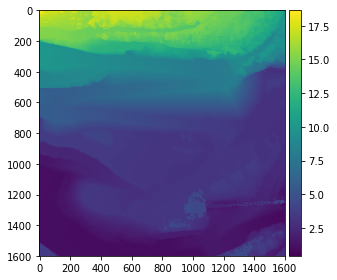

In [15]:
imshow(terrain)

In [16]:
np.save('querry.npy', terrain)

In [15]:
import time
with open(output_file_name,'w') as of:
    for line in custom_data:
#         print(line)
#         time.sleep(0.2)
        of.write(line)

In [ ]:
blank = np.zeros((10,10))
blank [0,1] = 1
blank [0,2] = 2
blank [0,3] = 3
print (blank[0,:])
print (blank[0,:].tolist())
print (str(blank[0,:].tolist())[1:-1])
#print (str(blank.tolist()))
print(blank[:,])
for li in blank[:,]:
    print(li.tolist())